**Stage 1: Study Replication**

The performance metrics for each dataset and classifier developed by Doppala et al. are presented in the figure below  (Doppala, Bhattacharyya, Janarthanan, & Baik, 2022).

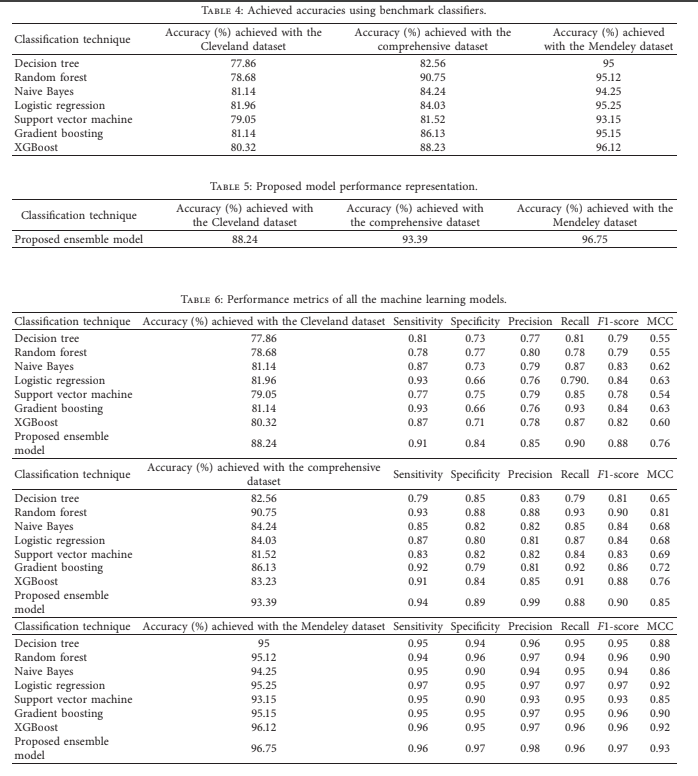

Bibliography

Doppala, B. P., Bhattacharyya, D., Janarthanan, M., & Baik, N. (2022, March 8). A Reliable Machine Intelligence Model for Accurate Identification of Cardiovascular Diseases Using Ensemble Techniques. Hindawi Journal of Healthcare Engineering, 2022. doi:https://doi.org/10.1155/2022/2585235









**Dataset 1: Cleveland Dataset**

Source: https://archive.ics.uci.edu/dataset/45/heart+disease



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/Heart_disease_cleveland_new.csv"
data_cleveland = pd.read_csv(path,encoding='utf-8-sig')
data_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
#Identify duplicate rows in Cleveland Clinic Data
cleveland_dups = data_cleveland[data_cleveland.duplicated(keep=False)]

#Count number of duplicate rows in Cleveland Clinic Data
if not cleveland_dups.empty:
      cleveland_dup_num = cleveland_dups.shape[0]
else:
    print("No duplicates in Cleveland dataset")

#Check for null values in Cleveland dataset
null_cleveland =data_cleveland.isna().sum().sum()
print("There are " + str(null_cleveland) + " null values in the Cleveland dataset")


No duplicates in Cleveland dataset
There are 0 null values in the Cleveland dataset


In [5]:
#one-hot coding of Cleveland Data categorical independent variables

#The variables treated with one-hot encoding is unclear in replication paper, however 5 variables below are commonly encoded as in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis by Gupta et. al
data_cleveland_coded = pd.get_dummies(data_cleveland, columns=['cp', 'restecg', 'slope','ca', 'thal'], prefix=['cp', 'restecg', 'slope', 'ca','thal'], drop_first=True)

In [6]:
#Output new column names as list for ease of use in test train split below
data_cleveland_coded.columns.values

array(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1',
       'restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
       'thal_2', 'thal_3'], dtype=object)

In [7]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_cleveland_coded.loc[:,['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang','oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1','restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']]
dependent = data_cleveland_coded.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [8]:
#Following advice of Jason Brownlee of https://machinelearningmastery.com/data-preparation-without-data-leakage/ and
#Data Preparation for Machine Learning Data Cleaning, Feature Selection, and Data Transforms in Python
#All data preparation must be fit on the training set only

#Data will be scaled using the minmaxscaler
from sklearn.preprocessing import MinMaxScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Initialize RobustScaler
scaler = MinMaxScaler()
#Fit on the training dataset to the RobustScaler instance. Fitting the data to the training set only prevents data leakage and the test set will be transformed based on training data parameters
scaler.fit(x_train[cleveland_numerical])

#Scale the training data using the RobustScaler instance
x_train[cleveland_numerical] = scaler.transform(x_train[cleveland_numerical])
#Scale the testing data using the RobustScaler instance
x_test[cleveland_numerical] = scaler.transform(x_test[cleveland_numerical])


In [9]:
#ca is the number of major vessels visible under fluorscopy. Upon additional literature review, it appears that this variable is commonly treated as a categorical variable. ca will be treated as a categorical variable as noted by other researchers including Gupta et. al in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis

#Use apply function and lambda to normalize the numeric columns using the normalization formula
cleveland_categorical = data_cleveland[['sex', 'cp','fbs','restecg','exang','slope','ca','thal','target']]
data_cleveland = data_cleveland.apply(lambda x: (x-min(x))/(max(x)-min(x)) if x.name not in cleveland_categorical else x)

In [10]:
#one-hot coding of Cleveland Data categorical independent variables

#The variables treated with one-hot encoding is unclear in replication paper, however 5 variables below are commonly encoded as in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis by Gupta et. al
data_cleveland_coded = pd.get_dummies(data_cleveland, columns=['cp', 'restecg', 'slope','ca', 'thal'], prefix=['cp', 'restecg', 'slope', 'ca','thal'], drop_first=True)

In [ ]:
data_cleveland_coded.head()

In [ ]:
#Output new column names as list for ease of use in test train split below
data_cleveland_coded.columns.values

In [ ]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_cleveland_coded.loc[:,['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang','oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1','restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']]
dependent = data_cleveland_coded.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Initialize the decision tree classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#Fit the training data set to the decision tree model
cleveland_decision_tree.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_decision_tree model
target_pred_decision_tree = cleveland_decision_tree.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 0 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
cleveland_random_forest.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_random_forest model
target_pred_random_forest = cleveland_random_forest.predict(x_test)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

In [ ]:
#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Initialize the naive bayes models and assign to variable
cleveland_naive_numerical = GaussianNB()
cleveland_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
cleveland_categorical_nb = ['sex', 'fbs', 'exang','cp_1', 'cp_2', 'cp_3', 'restecg_1','restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']
cleveland_numerical_nb = ['age','trestbps','chol','thalach','oldpeak']

# Fit the categorical features in the training data set to the categorical naive bayes model
cleveland_naive_categorical.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
cleveland_naive_numerical.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = cleveland_naive_categorical.predict_proba(x_test[cleveland_categorical_nb])
probability_numerical= cleveland_naive_numerical.predict_proba(x_test[cleveland_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

In [ ]:
#Logistic Regression

#Import logistic regression model from scikit-learn libraries
from sklearn.linear_model import LogisticRegression

#Initialize the logistic regression model and assign to variable wine_logistic_reg variable. Assign random_state 16 to reproduce results
cleveland_logistic_reg = LogisticRegression(random_state=42)

#Fit the training data set to the logistic model
cleveland_logistic_reg.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the cleveland_logistic_reg
target_pred_logistic = cleveland_logistic_reg.predict(x_test)

accuracy_logistic =  round(accuracy_score(y_test, target_pred_logistic),4)*100
precision_logistic = round(precision_score(y_test, target_pred_logistic, pos_label=1),3)
recall_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=1),3)
f1_score_logistic = round(f1_score(y_test, target_pred_logistic, pos_label=1),3)
mcc_logistic = round(matthews_corrcoef(y_test, target_pred_logistic),3)
specificity_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic = [["Logistic Regression", accuracy_logistic,specificity_logistic,precision_logistic,recall_logistic,f1_score_logistic,mcc_logistic]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_regression = performance_metrics

performance_metrics

In [ ]:
#Import support vector machine from scikit-learn libraries
from sklearn import svm

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_support_vector = svm.SVC(kernel='linear', random_state=42)

#Fit the training data set to the support vector machine classifier
cleveland_support_vector.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_support_vector
target_pred_support_vector = cleveland_support_vector.predict(x_test)

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector,specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics

In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

In [ ]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
cleveland_xgb.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_xgb
target_pred_xgb = cleveland_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

In [ ]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier

#Initialize a categorical naive bayes classifier and train using categorical training set
ensemble_categorical_nb = CategoricalNB()
ensemble_categorical_nb.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Initialize a gaussian naive bayes classifier and train using numerical (i.e continuous numerical features) training set
ensemble_numerical_nb = GaussianNB()
ensemble_numerical_nb.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state = 42)
ensemble_random_forest.fit(x_train, y_train.values.ravel())

ensemble_svm = svm.SVC(probability=True, random_state = 42)
ensemble_svm.fit(x_train, y_train.values.ravel())

ensemble_gradient = GradientBoostingClassifier(random_state = 42)
ensemble_gradient.fit(x_train, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_categorical_nb',ensemble_categorical_nb),('ensemble_numerical_nb',ensemble_numerical_nb),('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient),('ensemble_svm', ensemble_svm)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_train[cleveland_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_train[cleveland_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_train),
                     ensemble_gradient.predict_proba(x_train),
                     ensemble_svm.predict_proba(x_train)]),
    y_train.values.ravel()
)

#If acting similarly, may be weakening the classifiers
#Check performance with parametric and non-parametric statistics based on results. Normally distributed results - use ANOVA
#Wilcoxon - for medians
#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_test[cleveland_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_test[cleveland_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_test),
                     ensemble_gradient.predict_proba(x_test),
                     ensemble_svm.predict_proba(x_test)])
)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

In [ ]:
#Summary table - Stage 1 Basic Results

# Use concat to append DataFrames vertically
summary = pd.concat([st1_pm_decision_tree, st1_pm_random_forest, st1_pm_naive_bayes, st1_pm_logistic_regression, st1_pm_support_vector, st1_pm_gradient, st1_pm_xgb, st1_pm_ensemble], ignore_index=True)

#Remove row index values
summary.index = ["","","","","","","",""]
summary

#Although the same procedure was followed as the research paper, the accuracy of most models does not approximate that of the study except for Logistic Regression and Support Vector.
#The Ensemble Model, XGBoost and Naive Bayes show the greatest deviaton from the study paper. Notably, the classifiers that do not match the study results are tree-based or probabilistic for Naive Bayes

**Stage 1A: Changes to Approximate Study Accuracy**

Hyperparameter tuning will be attempted to approximate the accuracy measure of the study paper for tree-based methods.

In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_dt = GridSearchCV(cleveland_decision_tree , param_dist, cv=10)
grid_cleveland_dt.fit(x_train, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_cleveland_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
cleveland_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
cleveland_decision_tree.fit(x_train, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = cleveland_decision_tree.predict(x_test)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 15}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,76.23,0.833,0.811,0.694,0.748,0.531


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 75, 100, 125, 125, 175, 200, 300],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6,7,8,9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = GridSearchCV(cleveland_random_forest , param_dist, cv=10)
grid_cleveland_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Despite performing GridSearchCV, the accuracy remains unchanged. RandomSearchCV is attempted next

In [ ]:
#Import RandomizedSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = RandomizedSearchCV(cleveland_random_forest , param_dist, cv=10)
grid_cleveland_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_decision_tree = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Results are the same despite performing RandomSearchCV

In [ ]:
#Import RandomizedSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = RandomizedSearchCV(cleveland_random_forest , param_dist, cv=10)
grid_cleveland_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_decision_tree = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

In [ ]:
#Create list of n_estimators to cycle through. The hyperparameter n_estimators is the number of decision trees in the random forest
n_estimators = [x for x in range(1, 100)]

#Create empty lists to store the calculated accuracy and random state
accuracy_list = []
random_states = []

#Create loop to calculate the accuracy for combinations of n_estimators and random_state
#Due to the small dataset, the accuracy fluctuated with differing random_states
for i in n_estimators:
    #Initilized a random forest classifier with default values for hyperparameters except for n_estimators and random_state
    cleveland_rf_opt = RandomForestClassifier(n_estimators=i, random_state =i)
    #Fit the initialized model to the training data, convert y_train values to a 1-D array. Predict the heart disease classes using x_test as input
    cleveland_rf_opt.fit(x_train, y_train.values.ravel())
    target_pred_rf_opt = cleveland_rf_opt.predict(x_test)
    #Calculate the accuracy using y_test as the true values and the predicted targets
    model_accuracy = accuracy_score(y_test.values.ravel(), target_pred_rf_opt)
    accuracy_list.append(model_accuracy)
    random_states.append(i)

# Locate the index maximum accuracy, match to the list of n_estimators and random_states
max_estimators = n_estimators[accuracy_list.index(max(accuracy_list))]
max_random_state = random_states[accuracy_list.index(max(accuracy_list))]

#Output the maximum accuracy and the settings for the hyperparameters
print("The max accuracy is:", round(max(accuracy_list)*100,2))
print("The optimal n_estimators is: "+str(max_random_state)+". The optimal random_state is: "+str(max_random_state))

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(n_estimators=65, max_depth=None, min_samples_split=2, max_leaf_nodes=None, min_samples_leaf=1, max_samples=None, random_state = 65)
cleveland_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test,  target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test,  target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test,  target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test,  target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test,  target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]
#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

#This method of modifying only the number of trees and the random state provides the greatest accuracy and is closest to the research paper.
#The remaining performance metrics better approximate the results of the study paper with the exception of recall and F1 score.

In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable cleveland_gradient. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_cleveland_gb = GridSearchCV(cleveland_gradient, param_dist, cv=10)
grid_cleveland_gb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_cleveland_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
cleveland_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
cleveland_gradient.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,75.41,0.783,0.776,0.726,0.75,0.51


In [ ]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_xgb = GridSearchCV(cleveland_xgb , param_dist, cv=10)
grid_cleveland_xgb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_cleveland_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
cleveland_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
cleveland_xgb.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

{'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,76.23,0.85,0.824,0.677,0.743,0.535


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, recall_score
import pandas as pd

# Initialize the svm classifier
cleveland_svm = SVC(probability=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 1, 10],
}

# Initialize the RandomizedSearchCV class for SVM
grid_cleveland_svm = RandomizedSearchCV(cleveland_svm, param_dist, cv=10)
grid_cleveland_svm.fit(x_train, y_train.values.ravel())

# Output the best parameters, the model is optimized based on accuracy score
best_params_svm = grid_cleveland_svm.best_params_
print(best_params_svm)

# Fit the SVM model using the best parameters
cleveland_svm = SVC(**best_params_svm, probability=True, random_state=42)
cleveland_svm.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_svm = cleveland_svm.predict(x_test)

# Calculate Performance Metrics
accuracy_svm = round(accuracy_score(y_test, target_pred_svm), 4) * 100
precision_svm = round(precision_score(y_test, target_pred_svm, pos_label=1), 3)
recall_svm = round(recall_score(y_test, target_pred_svm, pos_label=1), 3)
f1_score_svm = round(f1_score(y_test, target_pred_svm, pos_label=1), 3)
mcc_svm = round(matthews_corrcoef(y_test, target_pred_svm), 3)
specificity_svm = round(recall_score(y_test, target_pred_svm, pos_label=0), 3)

# Organize performance metrics into a list
performance_svm = [["SVM", accuracy_svm, specificity_svm, precision_svm, recall_svm, f1_score_svm, mcc_svm]]

# Create a DataFrame of performance metrics
grid_svm_pm = pd.DataFrame(performance_svm, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_svm_pm.index = [""]

{'kernel': 'sigmoid', 'gamma': 0.1, 'degree': 2, 'C': 10}


In [ ]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier

#Initialize a categorical naive bayes classifier and train using categorical training set
ensemble_categorical_nb = CategoricalNB()
ensemble_categorical_nb.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Initialize a gaussian naive bayes classifier and train using numerical (i.e continuous numerical features) training set
ensemble_numerical_nb = GaussianNB()
ensemble_numerical_nb.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state = 42, min_samples_split= 15, min_samples_leaf= 4, max_depth= 10, criterion = 'entropy')
ensemble_random_forest.fit(x_train, y_train.values.ravel())

ensemble_svm = svm.SVC(probability=True, random_state = 42, kernel= 'sigmoid',gamma= 0.1, degree= 2, C= 10)
ensemble_svm.fit(x_train, y_train.values.ravel())

ensemble_gradient = GradientBoostingClassifier(random_state = 42, learning_rate=0.1, max_depth= 4, min_samples_leaf=4, min_samples_split= 2, n_estimators= 200)
ensemble_gradient.fit(x_train, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_categorical_nb',ensemble_categorical_nb),('ensemble_numerical_nb',ensemble_numerical_nb),('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient),('ensemble_svm', ensemble_svm)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_train[cleveland_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_train[cleveland_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_train),
                     ensemble_gradient.predict_proba(x_train),
                     ensemble_svm.predict_proba(x_train)]),
    y_train.values.ravel()
)

#If acting similarly, may be weakening the classifiers
#Check performance with parametric and non-parametric statistics based on results. Normally distributed results - use ANOVA
#Wilcoxon - for medians
#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_test[cleveland_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_test[cleveland_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_test),
                     ensemble_gradient.predict_proba(x_test),
                     ensemble_svm.predict_proba(x_test)])
)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Ensemble,75.41,0.783,0.776,0.726,0.75,0.51


**Stage 2: Improvements to Classifiers**

In [11]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/Heart_disease_cleveland_new.csv"
data_cleveland = pd.read_csv(path,encoding='utf-8-sig')
data_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [12]:
#one-hot coding of Cleveland Data categorical independent variables

#The variables treated with one-hot encoding is unclear in replication paper, however 5 variables below are commonly encoded as in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis by Gupta et. al
data_cleveland_coded = pd.get_dummies(data_cleveland, columns=['cp', 'restecg', 'slope','ca', 'thal'], prefix=['cp', 'restecg', 'slope', 'ca','thal'], drop_first=True)

In [13]:
#Output new column names as list for ease of use in test train split below
data_cleveland_coded.columns.values

array(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1',
       'restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
       'thal_2', 'thal_3'], dtype=object)

In [14]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_cleveland_coded.loc[:,['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang','oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1','restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']]
dependent = data_cleveland_coded.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [15]:
#Following advice of Jason Brownlee of https://machinelearningmastery.com/data-preparation-without-data-leakage/ and
#Data Preparation for Machine Learning Data Cleaning, Feature Selection, and Data Transforms in Python
#All data preparation must be fit on the training set only

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit on the training dataset to the RobustScaler instance. Fitting the data to the training set only prevents data leakage and the test set will be transformed based on training data parameters
scaler.fit(x_train[cleveland_numerical])

#Scale the training data using the RobustScaler instance
x_train[cleveland_numerical] = scaler.transform(x_train[cleveland_numerical])
#Scale the testing data using the RobustScaler instance
x_test[cleveland_numerical] = scaler.transform(x_test[cleveland_numerical])


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
cleveland_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = cleveland_merge[cleveland_merge['target'] == 1]
healthy = cleveland_merge[cleveland_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['age']
age_healthy = healthy['age']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [["age", t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,age,3.044418,0.002683,Y


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
cleveland_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = cleveland_merge[cleveland_merge['target'] == 1]
healthy = cleveland_merge[cleveland_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['trestbps']
age_healthy = healthy['trestbps']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['trestbps', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,trestbps,1.532062,0.127273,N


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
cleveland_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = cleveland_merge[cleveland_merge['target'] == 1]
healthy = cleveland_merge[cleveland_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['chol']
age_healthy = healthy['chol']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['chol', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,chol,1.516038,0.131274,N


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
cleveland_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = cleveland_merge[cleveland_merge['target'] == 1]
healthy = cleveland_merge[cleveland_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['thalach']
age_healthy = healthy['thalach']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['thalach', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,thalach,-7.385374,5.553374e-12,Y


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
cleveland_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = cleveland_merge[cleveland_merge['target'] == 1]
healthy = cleveland_merge[cleveland_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['oldpeak']
age_healthy = healthy['oldpeak']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['oldpeak', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,oldpeak,7.28923,9.644224e-12,Y


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
cleveland_sex = pd.crosstab(x_train['sex'], y_train['target'])

# Calculate odds ratio and p-value for cleveland sex feature
odds_ratio, p_value = fisher_exact(cleveland_sex)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['sex', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,sex,2.913661,0.002142,Y


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
cleveland_sex = pd.crosstab(x_train['sex'], y_train['target'])

# Calculate odds ratio and p-value for cleveland sex feature
odds_ratio, p_value = fisher_exact(cleveland_sex)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['sex', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,sex,2.913661,0.002142,Y


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
cleveland_fbs = pd.crosstab(x_train['fbs'], y_train['target'])

# Calculate odds ratio and p-value for cleveland fasting blood sugar feature
odds_ratio, p_value = fisher_exact(cleveland_fbs)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['fbs', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,fbs,0.959488,1.0,N


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
cleveland_exang = pd.crosstab(x_train['exang'], y_train['target'])

# Calculate odds ratio and p-value for cleveland fasting blood sugar feature
odds_ratio, p_value = fisher_exact(cleveland_exang)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['exang', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,exang,11.272727,1.369253e-11,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
cleveland_chi = data_cleveland.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
cleveland_cp = pd.crosstab(cleveland_chi['cp'], cleveland_chi['target'])

# Calculate chi_sq value and p-value for cleveland chest pain feature
chi_sq, p_value, dof, expected = chi2_contingency(cleveland_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['cp', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,cp,47.819745,2.326113e-10,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
cleveland_chi = data_cleveland.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
cleveland_cp = pd.crosstab(cleveland_chi['restecg'], cleveland_chi['target'])

# Calculate chi_sq value and p-value for cleveland restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(cleveland_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['restecg', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,restecg,3.831708,0.147216,N


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
cleveland_chi = data_cleveland.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
cleveland_cp = pd.crosstab(cleveland_chi['slope'], cleveland_chi['target'])

# Calculate chi_sq value and p-value for cleveland restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(cleveland_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['slope', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,slope,42.934516,4.752129e-10,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
cleveland_chi = data_cleveland.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
cleveland_cp = pd.crosstab(cleveland_chi['ca'], cleveland_chi['target'])

# Calculate chi_sq value and p-value for cleveland restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(cleveland_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['ca', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,ca,37.765747,3.168368e-08,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
cleveland_chi = data_cleveland.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
cleveland_cp = pd.crosstab(cleveland_chi['thal'], cleveland_chi['target'])

# Calculate chi_sq value and p-value for cleveland restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(cleveland_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['thal', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,thal,50.54244,1.058885e-11,Y


In [ ]:
#Modify training and test records

#Features to drop based on simple filters
features_remove = ['fbs', 'restecg_1','restecg_2']

#Remove selected features from x_train and x_test to evaluate model based on hold-out method
x_train_simple = x_train.drop(columns=features_remove)
x_test_simple = x_test.drop(columns=features_remove)

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_remove = ['fbs', 'restecg_1','restecg_2']

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_decision_tree.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the cleveland_decision_tree model
target_pred_decision_tree = cleveland_decision_tree.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Decision Tree,71.31,0.767,0.745,0.661,0.701,0.43,0.010111,263.77


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_dt = GridSearchCV(cleveland_decision_tree , param_grid, cv=10)
grid_cleveland_dt.fit(x_train_simple, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_cleveland_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
cleveland_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
cleveland_decision_tree.fit(x_train_simple, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = cleveland_decision_tree.predict(x_test_simple)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 15}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,75.41,0.833,0.808,0.677,0.737,0.516


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
cleveland_decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 4, min_samples_split = 15, random_state=42)

# Initialize RepeatedStratifiedKFold (will complete 30 rounds in total)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_decision_tree.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_decision_tree = cleveland_decision_tree.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_decision_tree)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_decision_tree)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       74.91
Precision      76.23
Recall         66.43
F1 Score       70.55
MCC            49.71
Specificity    82.17
dtype: float64

Standard Deviation Metrics:
Accuracy        7.45
Precision       9.88
Recall         11.54
F1 Score        9.57
MCC            15.29
Specificity     8.41
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_random_forest.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the cleveland_random_forest model
target_pred_random_forest = cleveland_random_forest.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Random Forest,72.95,0.817,0.784,0.645,0.708,0.468,0.407271,201.67


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = GridSearchCV(cleveland_random_forest , param_grid, cv=10)
grid_cleveland_rf.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train_simple, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test_simple)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

{'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,74.59,0.833,0.804,0.661,0.726,0.501


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
cleveland_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= cleveland_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1),4))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1),4))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1),4))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest),4))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0),4))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       80.31
Precision      82.04
Recall         73.96
F1 Score       77.11
MCC            61.04
Specificity    85.86
dtype: float64

Standard Deviation Metrics:
Accuracy        6.24
Precision       8.20
Recall         12.72
F1 Score        8.29
MCC            12.87
Specificity     7.22
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the naive bayes models and assign to variable
cleveland_naive_numerical = GaussianNB()
cleveland_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
cleveland_categorical_nb = ['sex', 'exang','cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']
cleveland_numerical_nb = ['age','trestbps','chol','thalach','oldpeak']

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

# Fit the categorical features in the training data set to the categorical naive bayes model
cleveland_naive_categorical.fit(x_train_simple[cleveland_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
cleveland_naive_numerical.fit(x_train_simple[cleveland_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = cleveland_naive_categorical.predict_proba(x_test_simple[cleveland_categorical_nb])
probability_numerical= cleveland_naive_numerical.predict_proba(x_test_simple[cleveland_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Naive Bayes,75.41,0.817,0.796,0.694,0.741,0.514,0.046504,202.7


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB

# List categorical and numerical feature names
cleveland_categorical_nb = ['sex', 'exang', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3']
cleveland_numerical_nb = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize Naive Bayes models and assign to variables
cleveland_naive_categorical = CategoricalNB()
cleveland_naive_numerical = GaussianNB()

# Combine categorical and numerical features
x_naive = x_simple[cleveland_categorical_nb + cleveland_numerical_nb]

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# Iterate through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_naive, y_simple):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_naive.iloc[train_index], x_naive.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    # Fit the training data set to the categorical and numerical Naive Bayes models
    cleveland_naive_categorical.fit(x_train_fold[cleveland_categorical_nb], y_train_fold.values.ravel())
    cleveland_naive_numerical.fit(x_train_fold[cleveland_numerical_nb], y_train_fold.values.ravel())

    # Predict probabilities for using categorical and numerical features
    probability_categorical = cleveland_naive_categorical.predict_proba(x_test_fold[cleveland_categorical_nb])
    probability_numerical = cleveland_naive_numerical.predict_proba(x_test_fold[cleveland_numerical_nb])

    # Combine the probabilities using the product rule
    total_probability = probability_categorical * probability_numerical

    # Use this code to select the class that has the greatest probability for a given row
    target_pred_naive = np.argmax(total_probability, axis=1)

    # Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_naive) * 100, 2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_naive) * 100, 2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=0) * 100, 2))

# Create a DataFrame to store metrics for each fold
performance_metrics_naive = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

# Calculate mean and standard deviation across folds
mean_metrics_naive = round(performance_metrics_naive.mean(), 2)
std_metrics_naive = round(performance_metrics_naive.std(), 2)

# Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics_naive)
print('\nStandard Deviation Metrics:')
print(std_metrics_naive)

# performance_metrics_naive

Mean Metrics:
Accuracy       83.48
Precision      82.89
Recall         81.21
F1 Score       81.84
MCC            66.97
Specificity    85.33
dtype: float64

Standard Deviation Metrics:
Accuracy       4.72
Precision      7.32
Recall         6.45
F1 Score       5.33
MCC            9.65
Specificity    7.30
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_logistic_reg = LogisticRegression(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_logistic_reg.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the cleveland_logistic_reg model
target_pred_logistic_reg = cleveland_logistic_reg.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_logistic_reg =  round(accuracy_score(y_test, target_pred_logistic_reg),4)*100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1),3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1),3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1),3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg),3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg,precision_logistic_reg,recall_logistic_reg,f1_score_logistic_reg,mcc_logistic_reg, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_reg = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Logistic Regression,81.97,0.85,0.845,0.79,0.817,0.641,0.013889,261.21


In [ ]:
# Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier and assign it to the variable cleveland_logistic_reg. Assign random_state 42 to reproduce results
cleveland_logistic_reg = LogisticRegression(random_state=42)

# A parameter grid for logistic regression
param_grid = {'max_iter':[100,110,120,130,140],
              'C' : [1.0,1.5,2.0,2.5]}

# Initialize the GridSearchCV class using the logistic regression model, the parameter grid, and a 10-fold cross-validation
grid_cleveland_lr = GridSearchCV(cleveland_logistic_reg, param_grid, cv=10)
grid_cleveland_lr.fit(x_train_simple, y_train.values.ravel())

# Output the best parameters based on accuracy score
best_params_lr = grid_cleveland_lr.best_params_
print(best_params_lr)

#Fit the model using the best parameters
cleveland_logistic_reg = LogisticRegression(**best_params_lr, random_state=42)
cleveland_logistic_reg.fit(x_train_simple, y_train.values.ravel())

#Use the best model to calculate predictions
target_pred_logistic_reg = cleveland_logistic_reg.predict(x_test_simple)

# Calculate Performance Metrics
accuracy_logistic_reg = round(accuracy_score(y_test, target_pred_logistic_reg), 4) * 100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg), 3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0), 3)

# Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_score_logistic_reg, mcc_logistic_reg]]

# Create a DataFrame of performance metrics
grid_lr_pm = pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_lr_pm.index = [""]

grid_lr_pm

{'C': 1.0, 'max_iter': 100}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Logistic Regression,78.69,0.817,0.81,0.758,0.783,0.575


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_logistic_reg = LogisticRegression(C= 1.0, max_iter= 100, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_logistic_reg.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_logistic_reg= cleveland_logistic_reg.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_logistic_reg)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_logistic_reg),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=0),2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       85.36
Precision       0.86
Recall          0.82
F1 Score        0.83
MCC             0.71
Specificity     0.89
dtype: float64

Standard Deviation Metrics:
Accuracy       5.55
Precision      0.07
Recall         0.09
F1 Score       0.07
MCC            0.11
Specificity    0.07
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Support Vector Machine

from sklearn.model_selection import cross_val_score
from sklearn import svm

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_support_vector = svm.SVC(kernel='linear', random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_support_vector.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_support_vector = cleveland_support_vector.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector, specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Support Vector,79.51,0.867,0.849,0.726,0.783,0.598,0.033995,244.57


In [ ]:
# Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the SVM classifier and assign it to the variable cleveland_svm. Assign random_state 42 to reproduce results
cleveland_svm = SVC(random_state=42)

# A parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the GridSearchCV class using the SVM model, the parameter grid, and a 10-fold cross-validation
grid_cleveland_svm = GridSearchCV(cleveland_svm, param_grid, cv=10)
grid_cleveland_svm.fit(x_train_simple, y_train.values.ravel())

# Output the best parameters based on accuracy score
best_params_svm = grid_cleveland_svm.best_params_
print(best_params_svm)

# Fit the model using the best parameters
cleveland_svm = SVC(**best_params_svm, random_state=42)
cleveland_svm.fit(x_train_simple, y_train.values.ravel())

# Use the best model to calculate predictions
target_pred_svm = cleveland_svm.predict(x_test_simple)

# Calculate Performance Metrics
accuracy_svm = round(accuracy_score(y_test, target_pred_svm), 4) * 100
precision_svm = round(precision_score(y_test, target_pred_svm, pos_label=1), 3)
recall_svm = round(recall_score(y_test, target_pred_svm, pos_label=1), 3)
f1_score_svm = round(f1_score(y_test, target_pred_svm, pos_label=1), 3)
mcc_svm = round(matthews_corrcoef(y_test, target_pred_svm), 3)
specificity_svm = round(recall_score(y_test, target_pred_svm, pos_label=0), 3)

# Organize performance metrics into a list
performance_svm = [["Support Vector Machine", accuracy_svm, specificity_svm, precision_svm, recall_svm, f1_score_svm, mcc_svm]]

# Create a DataFrame of performance metrics
grid_svm_pm = pd.DataFrame(performance_svm, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_svm_pm.index = [""]

grid_svm_pm

{'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector Machine,77.87,0.783,0.787,0.774,0.78,0.557


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_support_vector = svm.SVC(kernel='linear', random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_support_vector.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_support_vector= cleveland_support_vector.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_support_vector)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_support_vector)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       83.95
Precision      85.67
Recall         78.90
F1 Score       81.67
MCC            68.22
Specificity    88.30
dtype: float64

Standard Deviation Metrics:
Accuracy        5.19
Precision       7.90
Recall          9.54
F1 Score        6.37
MCC            10.57
Specificity     6.98
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_gradient.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_gradient = cleveland_gradient.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient", accuracy_gradient, specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient,77.87,0.817,0.807,0.742,0.773,0.56,0.108624,203.93


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable cleveland_gradient. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_cleveland_gb = GridSearchCV(cleveland_gradient, param_dist, cv=10)
grid_cleveland_gb.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_cleveland_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
cleveland_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
cleveland_gradient.fit(x_train_simple, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test_simple)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,72.95,0.783,0.764,0.677,0.718,0.463


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       79.54
Precision      79.85
Recall         75.05
F1 Score       76.94
MCC            59.23
Specificity    83.38
dtype: float64

Standard Deviation Metrics:
Accuracy        5.77
Precision       8.30
Recall          9.70
F1 Score        6.80
MCC            11.87
Specificity     7.71
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#XGBoost

#Import xgb boosting classifier from scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_xgb.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_xgb = cleveland_xgb.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb, specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,77.05,0.833,0.815,0.71,0.759,0.547,0.760564,222.71


In [ ]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_xgb = GridSearchCV(cleveland_xgb , param_grid, cv=10)
grid_cleveland_xgb.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_cleveland_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
cleveland_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
cleveland_xgb.fit(x_train_simple, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_xgb.predict(x_test_simple)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       79.54
Precision      79.85
Recall         75.05
F1 Score       76.94
MCC            59.23
Specificity    83.38
dtype: float64

Standard Deviation Metrics:
Accuracy        5.77
Precision       8.30
Recall          9.70
F1 Score        6.80
MCC            11.87
Specificity     7.71
dtype: float64


In [ ]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier


# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state = 42)
ensemble_random_forest.fit(x_train_simple, y_train.values.ravel())


ensemble_gradient = GradientBoostingClassifier(random_state = 42)
ensemble_gradient.fit(x_train_simple, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_gradient.predict_proba(x_train_simple),
                     ensemble_random_forest.predict_proba(x_train_simple)]),
    y_train.values.ravel()
)

#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_gradient.predict_proba(x_test_simple),
                     ensemble_random_forest.predict_proba(x_test_simple)])
)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Ensemble,73.77,0.8,0.778,0.677,0.724,0.481,0.882053,261.97


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Initialize classifiers

ensemble_random_forest = RandomForestClassifier(random_state=42)
ensemble_gradient = GradientBoostingClassifier(random_state=42)

# Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_random_forest', ensemble_random_forest),('ensemble_gradient', ensemble_gradient)]

ensemble = VotingClassifier(estimators=algorithms, voting='soft')

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]


    # Fit the entire training set
    ensemble_random_forest.fit(x_train_fold, y_train_fold.values.ravel())
    ensemble_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Specify Algorithms and initialize ensemble model using a soft voting classifier
    algorithms = [('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient)]
    ensemble = VotingClassifier(estimators=algorithms, voting='soft')

    #Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
    ensemble.fit(np.column_stack([ensemble_random_forest.predict_proba(x_train_fold),ensemble_gradient.predict_proba(x_train_fold),]),y_train_fold.values.ravel())

    #With the ensemble model, we can make predictions on the target values
    target_pred_ensemble = ensemble.predict(np.column_stack([ensemble_random_forest.predict_proba(x_test_fold), ensemble_gradient.predict_proba(x_test_fold)]))

    #Calculate performance metrics for the current fold
    accuracy_list.append(accuracy_score(y_test_fold, target_pred_ensemble))
    precision_list.append(precision_score(y_test_fold, target_pred_ensemble, pos_label=1))
    recall_list.append(recall_score(y_test_fold, target_pred_ensemble, pos_label=1))
    f1_list.append(f1_score(y_test_fold, target_pred_ensemble, pos_label=1))
    mcc_list.append(matthews_corrcoef(y_test_fold, target_pred_ensemble))
    specificity_list.append(recall_score(y_test_fold, target_pred_ensemble, pos_label=0))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = performance_metrics_fold.mean()
std_metrics = performance_metrics_fold.std()

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold


Mean Metrics:
Accuracy       0.809713
Precision      0.805417
Recall         0.777839
F1 Score       0.786964
MCC            0.621872
Specificity    0.838235
dtype: float64

Standard Deviation Metrics:
Accuracy       0.068794
Precision      0.082283
Recall         0.117434
F1 Score       0.083133
MCC            0.140508
Specificity    0.075333
dtype: float64


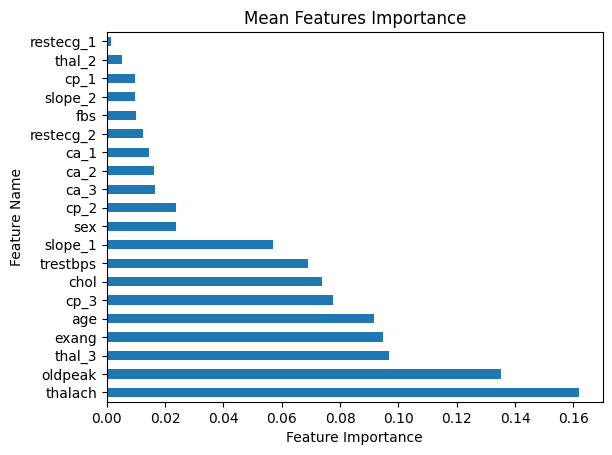

In [ ]:
#Feature Selection using Embedded Methods

#Random Forest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier


#Initialize the random forest classifier. Assign random_state 42 to reproduce results
random_forest_embedded = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
random_forest_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(random_forest_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Mean Features Importance')
plt.show()

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['restecg_1', 'thal_2','cp_1','slope_2','fbs','restecg_2','ca_1','ca_2','ca_3','cp_2','sex']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#Repeat Random Forest Classifier and Output Statistics
#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 0 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
cleveland_random_forest.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the cleveland_random_forest model
target_pred_random_forest = cleveland_random_forest.predict(x_test_embedded)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,71.31,0.783,0.755,0.645,0.696,0.432


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = GridSearchCV(cleveland_random_forest , param_grid, cv=10)
grid_cleveland_rf.fit(x_train_embedded, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train_embedded, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test_embedded)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
cleveland_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= cleveland_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       77.00
Precision      76.90
Recall         72.44
F1 Score       74.07
MCC            54.23
Specificity    81.02
dtype: float64

Standard Deviation Metrics:
Accuracy        5.19
Precision       7.59
Recall         10.07
F1 Score        6.50
MCC            10.53
Specificity     8.06
dtype: float64


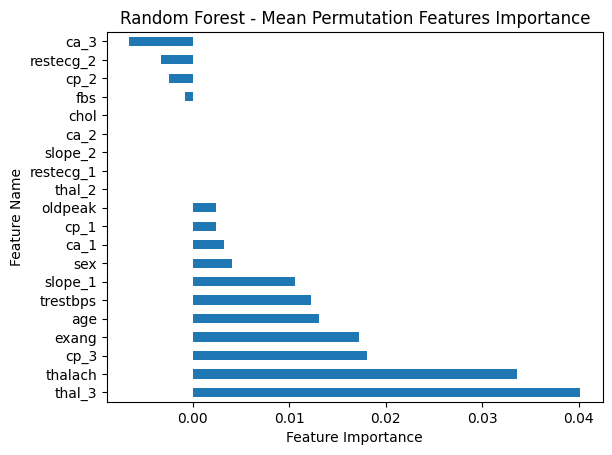

In [ ]:
#Feature Selection using Embedded Methods

#Random Forest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance #Neccessary class for permutation importances

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
random_forest_embedded = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
random_forest_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
random_permutation= permutation_importance(random_forest_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(random_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest - Mean Permutation Features Importance')
plt.show()

#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['restecg_2','chol','cp_2','fbs','ca_2','slope_2','thal_2','restecg_1','cp_1','sex','oldpeak']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'thalach']

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#Repeat Random Forest Classifier and Output Statistics
#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 0 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the random forest classifier
cleveland_random_forest.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the cleveland_random_forest model
target_pred_random_forest = cleveland_random_forest.predict(x_test_perm)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest,computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC','Computation Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computation Speed,Memory Usage
,Random Forest,76.23,0.8,0.789,0.726,0.756,0.527,0.334595,272.76


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
cleveland_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= cleveland_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       78.88
Precision      81.57
Recall         71.06
F1 Score       75.23
MCC            58.29
Specificity    85.66
dtype: float64

Standard Deviation Metrics:
Accuracy        6.24
Precision       9.58
Recall         11.91
F1 Score        7.96
MCC            12.95
Specificity     8.67
dtype: float64


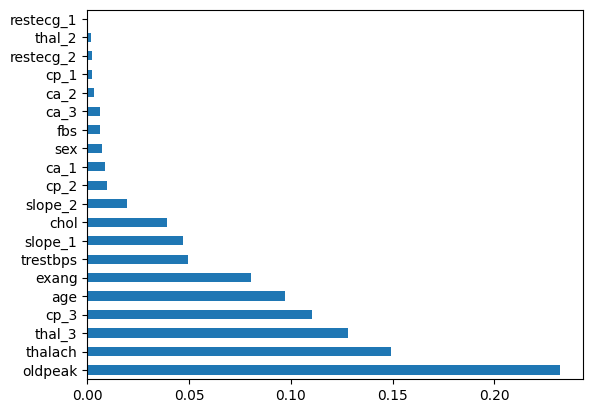

In [ ]:
#Feature Selection using Embedded Methods

#Gradient Boosting Feature Importance Plot
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
gradient_embedded =GradientBoostingClassifier(random_state=42)

#Fit the training data set to the random forest classifier
gradient_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(gradient_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['restecg_1', 'thal_2','restecg_2', 'cp_1','ca_2','ca_3','fbs','sex', 'ca_1','cp_2','slope_2']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test_embedded)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,70.49,0.733,0.724,0.677,0.7,0.411


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable cleveland_gradient. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_cleveland_gb = GridSearchCV(cleveland_gradient, param_dist, cv=10)
grid_cleveland_gb.fit(x_train_embedded, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_cleveland_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
cleveland_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
cleveland_gradient.fit(x_train_embedded, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test_embedded)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       76.80
Precision      75.39
Recall         73.66
F1 Score       73.95
MCC            53.82
Specificity    79.55
dtype: float64

Standard Deviation Metrics:
Accuracy        7.27
Precision       8.01
Recall         13.91
F1 Score        9.50
MCC            15.06
Specificity     7.67
dtype: float64


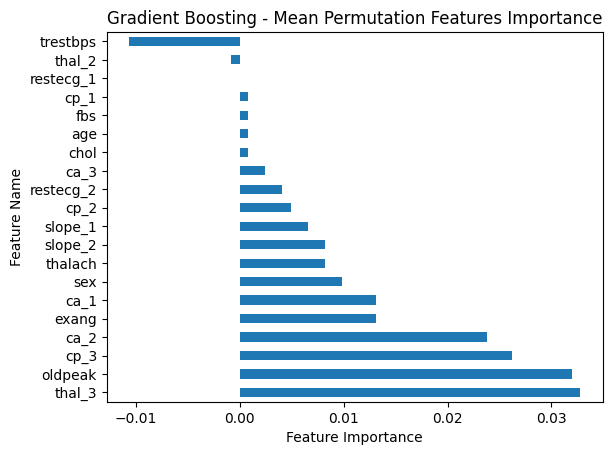

In [ ]:
#Feature Selection using Embedded Methods

#Gradient Boosting Feature Importance Plot
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance #Neccessary class for permutation importances

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
gradient_embedded =GradientBoostingClassifier(random_state=42)

#Fit the training data set to the random forest classifier
gradient_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
gradient_permutation= permutation_importance(gradient_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(gradient_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Gradient Boosting - Mean Permutation Features Importance')
plt.show()

#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['thal_2','restecg_1','cp_1','age','chol','fbs','ca_3','restecg_2','cp_2','slope_1']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['trestbps', 'thalach', 'oldpeak']

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test_perm)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient, computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient Boosting,77.87,0.883,0.857,0.677,0.757,0.572,0.256542,273.79


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       76.57
Precision       0.77
Recall          0.71
F1 Score        0.73
MCC             0.53
Specificity     0.82
dtype: float64

Standard Deviation Metrics:
Accuracy       7.31
Precision      0.10
Recall         0.12
F1 Score       0.09
MCC            0.15
Specificity    0.10
dtype: float64


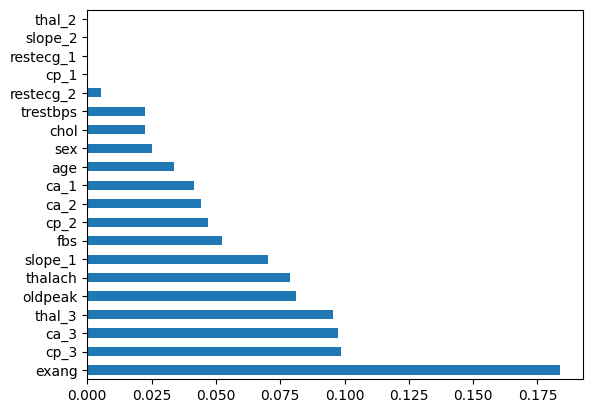

In [17]:
#Feature Selection using Embedded Methods

#XGBoost Feature Importance Plot
import xgboost as xgb

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
xgboost_embedded =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the random forest classifier
xgboost_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(xgboost_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['thal_2','slope_2','restecg_1','cp_1','restecg_2','trestbps','chol','sex','age']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['thalach', 'oldpeak']

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
cleveland_xgb.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the cleveland_xgb
target_pred_xgb = cleveland_xgb.predict(x_test_embedded)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,73.77,0.8,0.778,0.677,0.724,0.481


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       80.76
Precision      80.82
Recall         76.76
F1 Score       78.31
MCC            61.69
Specificity    84.22
dtype: float64

Standard Deviation Metrics:
Accuracy        7.40
Precision       9.47
Recall         11.65
F1 Score        9.14
MCC            15.03
Specificity     8.70
dtype: float64


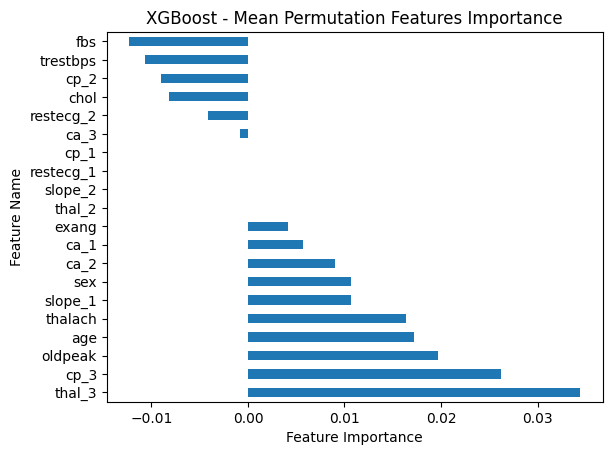

In [18]:
#Feature Selection using Embedded Methods

#XGBoost Feature Importance Plot
import xgboost as xgb
from sklearn.inspection import permutation_importance

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
xgboost_embedded =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the random forest classifier
xgboost_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
xgboost_permutation= permutation_importance(xgboost_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(xgboost_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('XGBoost - Mean Permutation Features Importance')
plt.show()

#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least relevant features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['restecg_2','ca_3', 'cp_1','thal_2' 'slope_2','restecg_1','cp_1','exang','ca_1']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'thalach']

#Separate target column
x_simple = data_cleveland_coded.drop(columns=['target'] + features_remove)
y_simple = data_cleveland_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[cleveland_numerical] = scaler.fit_transform(x_simple[cleveland_numerical])

In [ ]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()


#Fit the training data set to the support vector machine classifier
cleveland_xgb.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the cleveland_xgb
target_pred_xgb = cleveland_xgb.predict(x_test_perm)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb,computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,72.95,0.717,0.73,0.742,0.736,0.459,0.143458,273.79


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       76.57
Precision      77.39
Recall         70.82
F1 Score       73.22
MCC            53.46
Specificity    81.56
dtype: float64

Standard Deviation Metrics:
Accuracy        7.31
Precision      10.25
Recall         12.19
F1 Score        8.83
MCC            14.83
Specificity     9.90
dtype: float64


**Wrapper Methods of Feature Selection: Backwards Elimination**

In [ ]:
pip install mlxtend

**Backward Elimination: Decision Tree Classifier**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate decision tree classifier and set random state to ensure reproducibility of the results
decision_backward =DecisionTreeClassifier(random_state = 42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=decision_backward,
           k_features=(1, 20), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train)

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
20  0.701652  (age, sex, trestbps, chol, fbs, thalach, exang...
19  0.756907  (age, sex, trestbps, chol, fbs, exang, oldpeak...
18  0.795796  (age, sex, trestbps, chol, fbs, exang, oldpeak...
17   0.79009  (age, sex, chol, fbs, exang, oldpeak, cp_1, cp...
16  0.834234  (age, sex, chol, fbs, exang, oldpeak, cp_1, cp...
15  0.834084  (age, sex, chol, fbs, exang, oldpeak, cp_1, cp...
14   0.83964  (age, sex, fbs, exang, oldpeak, cp_1, cp_2, cp...
13   0.83964  (age, sex, fbs, exang, oldpeak, cp_1, cp_2, cp...
12  0.828829  (age, sex, fbs, exang, oldpeak, cp_1, cp_2, cp...
11  0.823423  (age, sex, fbs, exang, oldpeak, cp_2, cp_3, sl...
10  0.828829  (age, fbs, exang, oldpeak, cp_2, cp_3, slope_2...
9   0.856306  (age, fbs, exang, oldpeak, cp_3, slope_2, ca_3...
8   0.828829  (age, fbs, oldpeak, cp_3, slope_2, ca_3, thal_...
7   0.828829  (age, fbs, oldpeak, cp_3, slope_2, thal_2, tha...
6   0.806607         (age, fbs, oldpeak,

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age','oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_cleveland_coded.drop(columns=['target'])
y_backward = data_cleveland_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[cleveland_numerical] = scaler.fit_transform(x_backward[cleveland_numerical])

x_backward.head()

,age,fbs,exang,oldpeak,cp_3,slope_2,ca_3,thal_2,thal_3
0,0.538462,1,0,0.9375,0,1,0,1,0
1,0.846154,0,1,0.4375,1,0,1,0,0
2,0.846154,0,1,1.1250,1,0,0,0,1
3,-1.461538,0,0,1.6875,0,1,0,0,0
4,-1.153846,0,0,0.3750,0,0,0,0,0


In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_decision_tree.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the cleveland_decision_tree model
target_pred_decision_tree = cleveland_decision_tree.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Decision Tree,66.39,0.75,0.706,0.581,0.637,0.335,0.033554,273.79


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_dt = GridSearchCV(cleveland_decision_tree , param_grid, cv=10)
grid_cleveland_dt.fit(x_train_backward, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_cleveland_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
cleveland_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
cleveland_decision_tree.fit(x_train_backward, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = cleveland_decision_tree.predict(x_test_backward)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,66.39,0.75,0.706,0.581,0.637,0.335


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold (will complete 30 rounds in total)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_decision_tree.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_decision_tree = cleveland_decision_tree.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_decision_tree)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_decision_tree)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       70.42
Precision      69.54
Recall         65.92
F1 Score       67.12
MCC            40.90
Specificity    74.24
dtype: float64

Standard Deviation Metrics:
Accuracy        8.42
Precision      12.54
Recall         10.60
F1 Score        9.62
MCC            17.26
Specificity    12.61
dtype: float64


**Backward Elimination: Random Forest**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
random_backward =RandomForestClassifier(random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=random_backward,
           k_features=(1, 20), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
20  0.834084  (age, sex, trestbps, chol, fbs, thalach, exang...
19  0.845345  (age, sex, trestbps, chol, fbs, thalach, exang...
18  0.850751  (age, sex, trestbps, chol, fbs, thalach, exang...
17   0.83979  (age, sex, trestbps, chol, fbs, thalach, exang...
16   0.83994  (age, sex, trestbps, chol, fbs, thalach, exang...
15   0.83979  (age, trestbps, chol, fbs, thalach, exang, old...
14   0.83964  (age, trestbps, chol, fbs, thalach, exang, old...
13   0.83994  (age, trestbps, chol, fbs, exang, oldpeak, cp_...
12  0.845345  (age, trestbps, chol, fbs, exang, oldpeak, cp_...
11   0.83979  (age, trestbps, chol, fbs, exang, oldpeak, cp_...
10  0.845495  (age, trestbps, chol, fbs, exang, oldpeak, cp_...
9    0.83994  (age, trestbps, chol, exang, oldpeak, cp_1, cp...
8   0.850901  (age, trestbps, chol, exang, oldpeak, cp_2, sl...
7   0.834535   (age, chol, exang, oldpeak, cp_2, slope_1, ca_3)
6    0.83964            (age, chol, exan

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol',  'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_cleveland_coded.drop(columns=['target'])
y_backward = data_cleveland_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[cleveland_numerical] = scaler.fit_transform(x_backward[cleveland_numerical])

x_backward.head()

,age,trestbps,chol,exang,oldpeak,cp_2,slope_1,ca_3
0,0.538462,0.75,-0.125000,0,0.9375,0,0,0
1,0.846154,1.50,0.703125,1,0.4375,0,1,1
2,0.846154,-0.50,-0.187500,1,1.1250,0,1,0
3,-1.461538,0.00,0.140625,0,1.6875,1,0,0
4,-1.153846,0.00,-0.578125,0,0.3750,0,0,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_random_forest.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the cleveland_random_forest model
target_pred_random_forest = cleveland_random_forest.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Random Forest,68.03,0.733,0.709,0.629,0.667,0.364,0.304591,260.94


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
cleveland_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= cleveland_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       73.37
Precision      72.72
Recall         68.33
F1 Score       69.95
MCC            46.79
Specificity    77.71
dtype: float64

Standard Deviation Metrics:
Accuracy        7.90
Precision      10.06
Recall         11.97
F1 Score        9.18
MCC            16.13
Specificity     9.66
dtype: float64


**Backward Elimination: Logistic Regression**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
logistic_backward =LogisticRegression(random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=logistic_backward,
           k_features=(1, 20), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
20  0.856456  (age, sex, trestbps, chol, fbs, thalach, exang...
19  0.867417  (age, sex, trestbps, chol, fbs, exang, oldpeak...
18  0.878679  (age, sex, trestbps, chol, fbs, exang, oldpeak...
17  0.878679  (age, sex, trestbps, chol, fbs, exang, oldpeak...
16  0.878679  (age, sex, chol, fbs, exang, oldpeak, cp_1, cp...
15  0.884234  (age, sex, chol, exang, oldpeak, cp_1, cp_2, c...
14  0.878679  (age, sex, chol, exang, oldpeak, cp_1, cp_2, c...
13  0.878679  (age, sex, chol, exang, oldpeak, cp_1, cp_2, c...
12  0.884084  (age, sex, exang, oldpeak, cp_1, cp_2, cp_3, r...
11  0.872973  (age, sex, exang, oldpeak, cp_1, cp_2, cp_3, s...
10  0.872973  (age, sex, exang, oldpeak, cp_2, cp_3, slope_1...
9   0.867568  (sex, exang, oldpeak, cp_2, cp_3, slope_1, ca_...
8   0.862012  (sex, exang, oldpeak, cp_2, slope_1, ca_1, ca_...
7   0.867568  (exang, oldpeak, cp_2, slope_1, ca_1, ca_2, th...
6   0.867718      (exang, oldpeak, cp_2,

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age',  'chol',  'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_cleveland_coded.drop(columns=['target'])
y_backward = data_cleveland_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[cleveland_numerical] = scaler.fit_transform(x_backward[cleveland_numerical])

x_backward.head()

,age,sex,chol,exang,oldpeak,cp_1,cp_2,cp_3,restecg_2,slope_1,slope_2,ca_1,ca_2,thal_2,thal_3
0,0.538462,1,-0.125000,0,0.9375,0,0,0,1,0,1,0,0,1,0
1,0.846154,1,0.703125,1,0.4375,0,0,1,1,1,0,0,0,0,0
2,0.846154,1,-0.187500,1,1.1250,0,0,1,1,1,0,0,1,0,1
3,-1.461538,1,0.140625,0,1.6875,0,1,0,0,0,1,0,0,0,0
4,-1.153846,0,-0.578125,0,0.3750,1,0,0,1,0,0,0,0,0,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_logistic_reg = LogisticRegression(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_logistic_reg.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the cleveland_logistic_reg model
target_pred_logistic_reg = cleveland_logistic_reg.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_logistic_reg =  round(accuracy_score(y_test, target_pred_logistic_reg),4)*100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1),3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1),3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1),3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg),3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg,precision_logistic_reg,recall_logistic_reg,f1_score_logistic_reg,mcc_logistic_reg, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_reg = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Logistic Regression,81.15,0.8,0.81,0.823,0.816,0.623,0.018614,260.94


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_logistic_reg = LogisticRegression(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_logistic_reg.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_logistic_reg= cleveland_logistic_reg.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_logistic_reg)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_logistic_reg, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_logistic_reg),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       82.97
Precision       0.84
Recall          0.79
F1 Score        0.81
MCC             0.66
Specificity     0.86
dtype: float64

Standard Deviation Metrics:
Accuracy       6.85
Precision      0.09
Recall         0.12
F1 Score       0.08
MCC            0.14
Specificity    0.09
dtype: float64


**Backward Elimination: Support Vector Machine**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
support_vector_backward =svm.SVC(kernel='linear', random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=support_vector_backward,
           k_features=(1, 20), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])


   avg_score                                      feature_names
20  0.823273  (age, sex, trestbps, chol, fbs, thalach, exang...
19  0.845495  (age, sex, trestbps, chol, fbs, thalach, exang...
18  0.856456  (age, sex, chol, fbs, thalach, exang, oldpeak,...
17  0.862012  (age, sex, chol, fbs, thalach, exang, oldpeak,...
16  0.872823  (age, sex, chol, fbs, thalach, exang, cp_1, cp...
15  0.872823  (sex, chol, fbs, thalach, exang, cp_1, cp_3, r...
14  0.867267  (sex, chol, fbs, thalach, exang, cp_3, restecg...
13  0.867117  (sex, fbs, thalach, exang, cp_3, restecg_1, sl...
12  0.872673  (sex, fbs, thalach, exang, cp_3, slope_1, slop...
11  0.872673  (sex, fbs, thalach, exang, cp_3, slope_1, slop...
10  0.872673  (sex, thalach, exang, cp_3, slope_1, slope_2, ...
9   0.872673  (sex, exang, cp_3, slope_1, slope_2, ca_1, ca_...
8   0.872673  (sex, exang, cp_3, slope_1, slope_2, ca_1, ca_...
7   0.872823   (sex, exang, cp_3, slope_1, slope_2, ca_2, ca_3)
6   0.834234         (sex, exang, cp_3, 

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'chol', 'thalach']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_cleveland_coded.drop(columns=['target'])
y_backward = data_cleveland_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[cleveland_numerical] = scaler.fit_transform(x_backward[cleveland_numerical])

x_backward.head()

,age,sex,chol,fbs,thalach,exang,cp_1,cp_3,restecg_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,0.538462,1,-0.125000,1,-0.092308,0,0,0,0,0,1,0,0,0,1,0
1,0.846154,1,0.703125,0,-1.384615,1,0,1,0,1,0,0,0,1,0,0
2,0.846154,1,-0.187500,0,-0.738462,1,0,1,0,1,0,0,1,0,0,1
3,-1.461538,1,0.140625,0,1.046154,0,0,0,0,0,1,0,0,0,0,0
4,-1.153846,0,-0.578125,0,0.584615,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Support Vector Machine

from sklearn.model_selection import cross_val_score
from sklearn import svm

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_support_vector = svm.SVC(kernel='linear', random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_support_vector.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_support_vector = cleveland_support_vector.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector, specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Support Vector,77.87,0.833,0.818,0.726,0.769,0.562,0.010746,273.79


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_support_vector = svm.SVC(kernel='linear', random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_support_vector.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_support_vector= cleveland_support_vector.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_support_vector)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_support_vector)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold





Mean Metrics:
Accuracy       82.31
Precision      84.60
Recall         76.30
F1 Score       79.70
MCC            65.05
Specificity    87.52
dtype: float64

Standard Deviation Metrics:
Accuracy        6.74
Precision      10.10
Recall         10.23
F1 Score        7.80
MCC            13.68
Specificity     9.04
dtype: float64


**Backward Elimination: Gradient Boosting**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
gradient_backward =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=gradient_backward,
           k_features=(1, 20), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
20  0.801051  (age, sex, trestbps, chol, fbs, thalach, exang...
19  0.828679  (age, sex, trestbps, chol, fbs, thalach, exang...
18   0.83979  (age, sex, trestbps, chol, fbs, thalach, exang...
17  0.834234  (age, sex, trestbps, chol, fbs, thalach, exang...
16   0.83994  (age, sex, trestbps, chol, fbs, thalach, exang...
15  0.828829  (age, sex, trestbps, chol, fbs, thalach, exang...
14  0.845495  (age, sex, trestbps, chol, fbs, thalach, exang...
13  0.834234  (age, sex, trestbps, chol, fbs, thalach, exang...
12  0.845345  (age, sex, trestbps, chol, thalach, exang, cp_...
11  0.834234  (age, sex, chol, thalach, exang, cp_2, slope_1...
10  0.834384  (age, sex, chol, thalach, cp_2, slope_1, slope...
9   0.817868  (age, sex, chol, thalach, slope_1, slope_2, ca...
8   0.812613  (age, sex, chol, thalach, slope_1, slope_2, ca...
7   0.806907   (age, sex, chol, thalach, slope_1, ca_2, thal_3)
6   0.801351         (age, sex, thalach,

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps', 'chol', 'thalach']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_cleveland_coded.drop(columns=['target'])
y_backward = data_cleveland_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[cleveland_numerical] = scaler.fit_transform(x_backward[cleveland_numerical])

x_backward.head()

,age,sex,trestbps,chol,fbs,thalach,exang,cp_2,cp_3,slope_1,slope_2,ca_1,ca_2,thal_3
0,0.538462,1,0.75,-0.125000,1,-0.092308,0,0,0,0,1,0,0,0
1,0.846154,1,1.50,0.703125,0,-1.384615,1,0,1,1,0,0,0,0
2,0.846154,1,-0.50,-0.187500,0,-0.738462,1,0,1,1,0,0,1,1
3,-1.461538,1,0.00,0.140625,0,1.046154,0,1,0,0,1,0,0,0
4,-1.153846,0,0.00,-0.578125,0,0.584615,0,0,0,0,0,0,0,0


In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)


accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient,computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient Boosting,78.69,0.817,0.81,0.758,0.783,0.575,0.069642,274.05


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       79.31
Precision      79.47
Recall         75.11
F1 Score       76.66
MCC            58.93
Specificity    83.02
dtype: float64

Standard Deviation Metrics:
Accuracy        6.91
Precision       9.34
Recall         11.90
F1 Score        8.66
MCC            13.99
Specificity     8.75
dtype: float64


**Backward Elimination: XGBoost**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
xgb_backward =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=xgb_backward,
           k_features=(1, 20), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
20  0.812012  (age, sex, trestbps, chol, fbs, thalach, exang...
19  0.850751  (age, sex, trestbps, fbs, thalach, exang, oldp...
18  0.850751  (age, sex, trestbps, fbs, thalach, exang, oldp...
17  0.856156  (age, sex, trestbps, thalach, exang, oldpeak, ...
16  0.856156  (age, sex, trestbps, thalach, exang, oldpeak, ...
15  0.856156  (age, sex, trestbps, thalach, exang, oldpeak, ...
14  0.856156  (age, sex, trestbps, thalach, exang, oldpeak, ...
13  0.845345  (age, trestbps, thalach, exang, oldpeak, cp_2,...
12  0.845495  (age, trestbps, thalach, exang, oldpeak, cp_2,...
11  0.856607  (age, trestbps, exang, oldpeak, cp_2, cp_3, sl...
10  0.861862  (age, trestbps, exang, oldpeak, cp_2, cp_3, sl...
9   0.856306  (age, exang, oldpeak, cp_2, cp_3, slope_1, ca_...
8   0.856306  (age, exang, oldpeak, cp_2, cp_3, slope_1, ca_...
7   0.845195  (age, exang, oldpeak, cp_2, cp_3, slope_1, tha...
6   0.850751       (age, exang, oldpeak,

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
cleveland_numerical =['age', 'trestbps']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_cleveland_coded.drop(columns=['target'])
y_backward = data_cleveland_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[cleveland_numerical] = scaler.fit_transform(x_backward[cleveland_numerical])

x_backward.head()

,age,trestbps,exang,oldpeak,cp_2,cp_3,slope_1,ca_1,ca_3,thal_3
0,0.538462,0.75,0,2.3,0,0,0,0,0,0
1,0.846154,1.50,1,1.5,0,1,1,0,1,0
2,0.846154,-0.50,1,2.6,0,1,1,0,0,1
3,-1.461538,0.00,0,3.5,1,0,0,0,0,0
4,-1.153846,0.00,0,1.4,0,0,0,0,0,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#XGBoost

#Import xgb boosting classifier from scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_xgb.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_xgb = cleveland_xgb.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb, specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb = performance_metrics

performance_metrics


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,72.95,0.783,0.764,0.677,0.718,0.463,0.065644,261.71


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    cleveland_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= cleveland_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       77.78
Precision      76.51
Recall         75.81
F1 Score       75.58
MCC            56.04
Specificity    79.55
dtype: float64

Standard Deviation Metrics:
Accuracy        5.44
Precision       7.61
Recall         10.74
F1 Score        6.56
MCC            10.89
Specificity     9.31
dtype: float64


**Backward Elimination: Naive Bayes**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Perform backward elimination on categorical variables

#Instantiate classifier and set random state to ensure reproducibility of the results
naive_cat_backward =CategoricalNB()

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=naive_cat_backward,
           k_features=(1, len(cleveland_categorical_nb)), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])

#In addition, output the feature names to assist in naive bayes classification
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
12  0.867267  (sex, exang, cp_1, cp_2, cp_3, slope_1, slope_...
11  0.867267  (sex, exang, cp_1, cp_2, cp_3, slope_1, slope_...
10  0.867267  (sex, exang, cp_1, cp_2, cp_3, slope_1, slope_...
9   0.867267  (sex, exang, cp_1, cp_2, cp_3, slope_1, ca_2, ...
8   0.867267  (sex, exang, cp_2, cp_3, slope_1, ca_2, ca_3, ...
7   0.867267    (sex, exang, cp_2, cp_3, slope_1, ca_3, thal_3)
6   0.861562             (sex, exang, cp_2, cp_3, ca_3, thal_3)
5   0.856156                   (sex, exang, cp_3, ca_3, thal_3)
4   0.861562                        (exang, cp_3, ca_3, thal_3)
3   0.828378                              (exang, cp_3, thal_3)
2   0.795345                                    (exang, thal_3)
1   0.756907                                          (thal_3,)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
('sex', 'exang', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3')


In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Perform backward elimination on numerical variables

#Instantiate classifier and set random state to ensure reproducibility of the results
naive_num_backward =GaussianNB()

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=naive_num_backward,
           k_features=(1, len(cleveland_numerical_nb)), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])

#In addition, output the feature names to assist in naive bayes classification
print(max_features['feature_names'].values[0])

  avg_score                            feature_names
5  0.751952  (age, trestbps, chol, thalach, oldpeak)
4  0.763063        (age, trestbps, thalach, oldpeak)
3  0.774174             (trestbps, thalach, oldpeak)
2  0.774174                       (thalach, oldpeak)
1  0.757357                               (oldpeak,)
(1, 3, 4)
('trestbps', 'thalach', 'oldpeak')


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the naive bayes models and assign to variable
cleveland_naive_numerical = GaussianNB()
cleveland_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
cleveland_categorical_nb = ['sex', 'exang','cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']
cleveland_numerical_nb = ['trestbps','thalach','oldpeak']

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

# Fit the categorical features in the training data set to the categorical naive bayes model
cleveland_naive_categorical.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
cleveland_naive_numerical.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = cleveland_naive_categorical.predict_proba(x_test[cleveland_categorical_nb])
probability_numerical= cleveland_naive_numerical.predict_proba(x_test[cleveland_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Naive Bayes,76.23,0.85,0.824,0.677,0.743,0.535,0.07381,261.71


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB

# List categorical and numerical feature names
cleveland_categorical_nb = ['sex', 'exang', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3']
cleveland_numerical_nb = ['trestbps','thalach','oldpeak']

# Initialize Naive Bayes models and assign to variables
cleveland_naive_categorical = CategoricalNB()
cleveland_naive_numerical = GaussianNB()

# Combine categorical and numerical features
x_train_backward = x_train[cleveland_categorical_nb + cleveland_numerical_nb]

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# Iterate through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_train, y_train):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_train_backward.iloc[train_index], x_train_backward.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the training data set to the categorical and numerical Naive Bayes models
    cleveland_naive_categorical.fit(x_train_fold[cleveland_categorical_nb], y_train_fold.values.ravel())
    cleveland_naive_numerical.fit(x_train_fold[cleveland_numerical_nb], y_train_fold.values.ravel())

    # Predict probabilities for using categorical and numerical features
    probability_categorical = cleveland_naive_categorical.predict_proba(x_test_fold[cleveland_categorical_nb])
    probability_numerical = cleveland_naive_numerical.predict_proba(x_test_fold[cleveland_numerical_nb])

    # Combine the probabilities using the product rule
    total_probability = probability_categorical * probability_numerical

    # Use this code to select the class that has the greatest probability for a given row
    target_pred_naive = np.argmax(total_probability, axis=1)

    # Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_naive) * 100, 2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_naive) * 100, 2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=0) * 100, 2))

# Create a DataFrame to store metrics for each fold
performance_metrics_naive = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

# Calculate mean and standard deviation across folds
mean_metrics_naive = round(performance_metrics_naive.mean(), 2)
std_metrics_naive = round(performance_metrics_naive.std(), 2)

# Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics_naive)
print('\nStandard Deviation Metrics:')
print(std_metrics_naive)

# performance_metrics_naive

Mean Metrics:
Accuracy       87.25
Precision      87.32
Recall         83.04
F1 Score       84.50
MCC            74.53
Specificity    90.27
dtype: float64

Standard Deviation Metrics:
Accuracy        6.48
Precision       9.99
Recall         12.52
F1 Score        8.16
MCC            13.62
Specificity     7.94
dtype: float64
